<a href="https://colab.research.google.com/github/hukim1112/one-day-DL/blob/main/Pytorch_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import cv2
import torch
from matplotlib import pyplot as plt

# Step 1. 데이터 표현

------

# Numpy array

데이터의 수치적 표현은 텐서이며, 컴퓨터 내에서 텐서는 배열(array)이라는 자료구조로 표현된다. <br>
따라서 컴퓨터의 메모리 구조 내에서 우리는 텐서를 배열로 다루게 될 것이다. <br>
이것은 데이터들의 처리(즉 연산)의 대부분이 배열 간의 벡터연산 또는 행렬연산으로 구성됨을 시사한다.<br>

In [ ]:
# 예제 코드
# 1차원 배열(벡터) 생성
vector = np.array([1, 2, 3])

# 2차원 배열(행렬) 생성
matrix = np.array([[1, 2, 3], [4, 5, 6]])

# 3차원 배열 생성
tensor = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

vector, matrix, tensor

(array([1, 2, 3]),
 array([[1, 2, 3],
        [4, 5, 6]]),
 array([[[ 1,  2,  3],
         [ 4,  5,  6]],
 
        [[ 7,  8,  9],
         [10, 11, 12]]]))

In [ ]:
print(vector.shape, matrix.shape, tensor.shape)

(3,) (2, 3) (2, 2, 3)


In [ ]:
print(np.matmul(matrix, vector)) #matrix multiplication of (2x3) and (3x1) matrice

[14 32]


# Tabular data

주어진 [LendingClub.com](www.lendingclub.com) 데이터셋은 광범위한 신용 관련 데이터로 주어진 사람에게 대출을 해주었을 때의 리스크를 예측하기 위해 사용될 수 있습니다. 2007년부터 2010년까지의 대출 데이터를 사용하고 **차용인이 대출금을 전액 상환했는지 여부를 분류**하고 예측하는 것이 목적

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hukim1112/MLDL/master/lecture3/loan_data.csv')

In [ ]:
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.values[:5] #Lendingclub 데이터의 수치 표현

array([[1, 'debt_consolidation', 0.1189, 829.1, 11.35040654, 19.48, 737,
        5639.958333, 28854, 52.1, 0, 0, 0, 0],
       [1, 'credit_card', 0.1071, 228.22, 11.08214255, 14.29, 707,
        2760.0, 33623, 76.7, 0, 0, 0, 0],
       [1, 'debt_consolidation', 0.1357, 366.86, 10.37349118, 11.63, 682,
        4710.0, 3511, 25.6, 1, 0, 0, 0],
       [1, 'debt_consolidation', 0.1008, 162.34, 11.35040654, 8.1, 712,
        2699.958333, 33667, 73.2, 1, 0, 0, 0],
       [1, 'credit_card', 0.1426, 102.92, 11.29973224, 14.97, 667,
        4066.0, 4740, 39.5, 0, 1, 0, 0]], dtype=object)

# Images

이미지는 픽셀로 구성되어 있습니다. 각 픽셀은 이미지의 가장 작은 구성 단위로, 일반적으로 색상 정보를 가지고 있습니다.

- 흑백 이미지: 2차원 데이터로 표현됩니다. 각 픽셀은 밝기를 나타내는 하나의 수치 (보통 0에서 255 사이)를 가집니다.
- 컬러 이미지: 주로 3차원 데이터로 표현됩니다. 대부분의 컬러 이미지는 RGB (Red, Green, Blue) 채널을 사용하여 색상을 표현합니다. 이 경우, 각 픽셀은 세 개의 수치로 구성되며, 각각 빨강, 초록, 파랑 색상의 강도를 나타냅니다.

고차원성: 이미지는 고차원 데이터입니다. 예를 들어, 100x100 픽셀의 이미지는 단일 채널에서도 10,000개의 특성을 가집니다. 컬러 이미지의 경우 이는 세 배가 됩니다.

공간적 연관성: 이미지 내 픽셀들은 서로 공간적으로 연관되어 있습니다. 이웃하는 픽셀들은 종종 유사한 색상이나 강도를 가지며, 이는 이미지 내 객체나 형태를 인식하는 데 중요합니다.

스케일 변화에 민감함: 같은 객체라도 크기, 방향, 위치 등이 다를 수 있어, 이미지 인식 및 처리에 어려움을 주기도 합니다.

데이터 전처리의 중요성: 이미지 데이터는 종종 전처리 과정을 거치게 됩니다. 이는 크기 조정, 정규화, 데이터 증강 등을 포함할 수 있으며, 모델의 성능에 큰 영향을 미칩니다.

In [ ]:
!wget -O beach.jpg https://pix10.agoda.net/hotelImages/301716/-1/fe9724d8fb4da3dd4590353bd771a276.jpg?s=1024x768

--2024-03-14 06:32:17--  https://pix10.agoda.net/hotelImages/301716/-1/fe9724d8fb4da3dd4590353bd771a276.jpg?s=1024x768
Resolving pix10.agoda.net (pix10.agoda.net)... 192.229.173.244
Connecting to pix10.agoda.net (pix10.agoda.net)|192.229.173.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103788 (101K) [image/jpeg]
Saving to: ‘beach.jpg’

beach.jpg           100%[===================>] 101.36K  --.-KB/s    in 0.05s   

2024-03-14 06:32:17 (1.83 MB/s) - ‘beach.jpg’ saved [103788/103788]



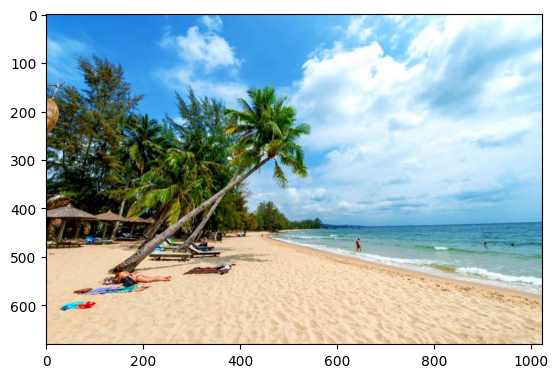

(681, 1024, 3)


In [ ]:
image = cv2.imread("beach.jpg")[:,:,::-1]
plt.imshow(image)
plt.show()

# the shape of image array
print(image.shape)

In [ ]:
#show the image array
print(image[0:3,0:3]) #RGB value of first to third pixels

[[[ 27 135 226]
  [ 27 135 226]
  [ 27 135 226]]

 [[ 27 135 226]
  [ 27 135 226]
  [ 27 135 226]]

 [[ 27 135 226]
  [ 27 135 226]
  [ 27 135 226]]]


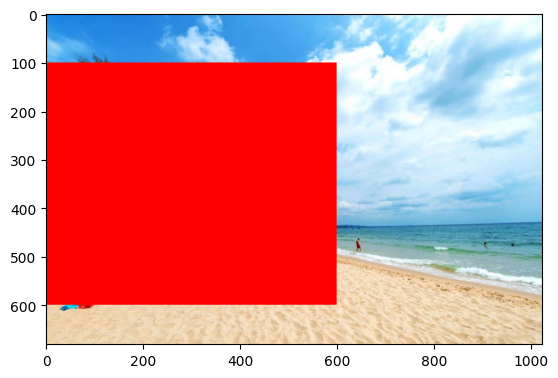

In [ ]:
image[100:600,0:600,:] = (255,0,0)
plt.imshow(image)
plt.show()

# Step 2. Pytorch
------

파이토치는 전세계에서 가장 인기있는 딥러닝 프레임워크입니다. 딥러닝을 위한 거의 모든 실험과 개발목표를 달성할 수 있고, 수많은 유저에 의해 형성된 강력한 오픈소스 생태계는 매우 경쟁력있습니다. 텐서는 동일한 타입(int32, int64, float32, float64, string 등)으로 구성된 다중차원의 배열을 의미한다. 파이썬의 numpy에 익숙하다면 이는 np.array의 일종이라고 생각할 수 있습니다. 텐서플로우와 파이토치는 텐서를 연산하는 다양한 연산자와 모델을 제공합니다.

In [ ]:
import torch

# This will be an int32 tensor by default; see "dtypes" below.
rank_0_tensor = torch.tensor(4)
print(rank_0_tensor)

# Let's make this a float tensor.
rank_1_tensor = torch.tensor([2.0, 3.0, 4.0])
print(rank_1_tensor)

# If you want to be specific, you can set the dtype (see below) at creation time
rank_2_tensor = torch.tensor([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=torch.float16)
print(rank_2_tensor)

tensor(4)
tensor([2., 3., 4.])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], dtype=torch.float16)


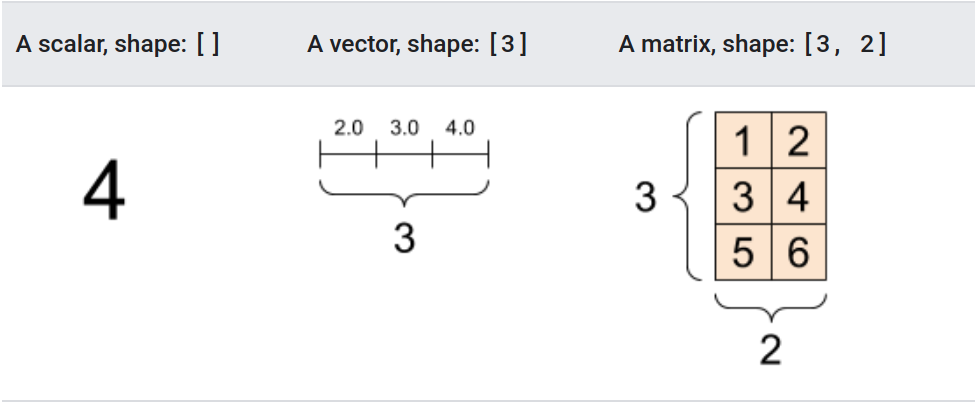

In [ ]:
rank_4_tensor = torch.zeros([3, 2, 4, 5]) #원하는 shape으로 tensor를 생성하며, 모든 element는 0으로 초기화
rank_4_tensor.shape

torch.Size([3, 2, 4, 5])

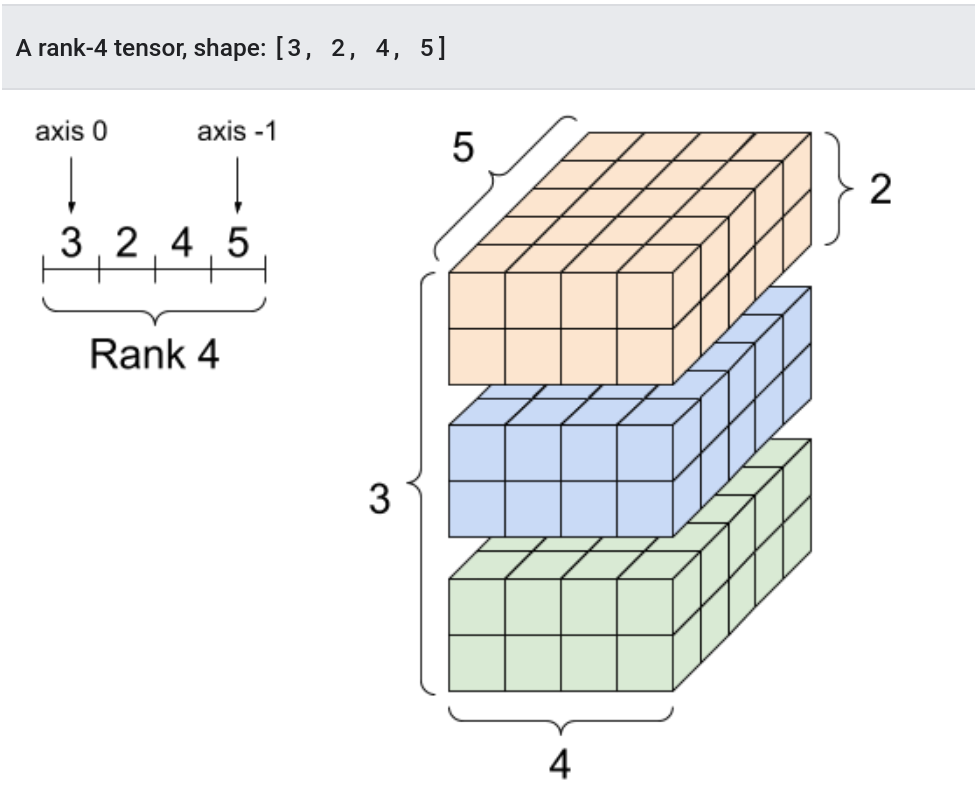

tensor를 사용하여 덧셈, 뺄셈 그리고 아다마르 곱(element-wise multiplication), 행렬곱(matrix multiplication) 등을 포함하여 기본적인 수치계산이 가능합니다.

In [ ]:
a = torch.tensor([[1, 2],
                 [3, 4]])
b = torch.tensor([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(torch.add(a, b), "\n")
print(torch.multiply(a, b), "\n") #element wise multiplication
print(torch.matmul(a, b), "\n") #matrix multiplication

tensor([[2, 3],
        [4, 5]]) 

tensor([[1, 2],
        [3, 4]]) 

tensor([[3, 3],
        [7, 7]]) 



In [ ]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tensor([[2, 3],
        [4, 5]]) 

tensor([[1, 2],
        [3, 4]]) 

tensor([[3, 3],
        [7, 7]]) 



딥러닝 프레임워크에서 가장 중요한 부분은 연산과정에서 어떤 두 변수 y와 x 사이의 자동미분(automatic differentiation)을 추적해준다는 것입니다. 모델 최적화를 위해 경사하강법을 사용하므로 이는 매우 중요한 특성입니다.

In [ ]:
w = torch.randn(3,2, requires_grad=True) #you can set the value of requires_grad when creating a tensor
b = torch.zeros(2, dtype=torch.float32, requires_grad=True)
x = torch.tensor([[1., 2., 3.]])

In [ ]:
true = torch.tensor([11., -2.])

In [ ]:
y = x @ w + b
f = torch.mean((y-true)**2)

우리가 관심있는 것은 w와 b의 변화에 따른 함수 f의 변화량이며, 이를 gradient라 한다.

w와 b 각각의 gradient $\frac{\partial{f}}{\partial{w_i}}$, $\frac{\partial{f}}{\partial{b_j}}$를 계산한 것을 dl_dw, dl_db라 하자.

In [ ]:
f.backward()
print("dl_dw", w.grad)
print("dl_db", b.grad)

dl_dw tensor([[-11.1460,   3.4512],
        [-22.2921,   6.9023],
        [-33.4381,  10.3535]])
dl_db tensor([-11.1460,   3.4512])


# Step 3. Try to attack synthetic regression tasks
------

# 선형 회귀 문제

데이터 분포가 선형성(y와 x 사이의 명확한 상관성)을 가질 때, 데이터 공간에서의 구조를 선형회귀 모델을 통해 추론 할 수 있습니다. 데이터의 특징이 1개일 때 선형회귀 모델은 2차원 공간(x,y)에서 직선, 2개일 때 3차원 공간(x1,x2,y)에서의 평면입니다.

선형적 데이터 생성 및 선형 회귀 모델 학습: 간단한 선형 데이터를 생성하고, 이를 사용하여 머신러닝의 선형 회귀 모델을 학습시킵니다. 그 후, 학습된 모델을 사용하여 데이터를 예측하고 시각화하여 모델이 데이터의 분포를 얼마나 잘 반영하는지 확인합니다.

In [ ]:
import numpy as np
import torch
import plotly.graph_objects as go

# 선형 데이터 생성

# 데이터 개수
m = 100

# 난수 시드 설정
np.random.seed(2022)
x1 = np.random.randn(m, 1)
np.random.seed(2022)
x2 = np.random.randn(m, 1)
y = x1 + x2 + np.random.rand(m, 1)

# 데이터 시각화
fig = go.Figure(data=[go.Scatter3d(x=x1[:,0], y=x2[:,0], z=y[:,0],
                                   mode='markers',
                                   marker=dict(size=3,
                                               colorscale='blues',
                                               opacity=0.8))])
fig.update_layout(scene=dict(
                    xaxis_title='X1',
                    yaxis_title='X2',
                    zaxis_title='Y (Answer)'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

# 데이터의 형태 확인
x = np.concatenate([x1, x2], axis=-1)
print("x shape:", x.shape)
print("y shape:", y.shape)

# PyTorch 텐서로 변환
train_x = torch.tensor(x, dtype=torch.float32)
train_y = torch.tensor(y, dtype=torch.float32)


x shape: (100, 2)
y shape: (100, 1)


# Low-level training code.

선형모델을 사용해 데이터 학습

Step 0: Loss 0.874743640422821
Step 10: Loss 0.5066137909889221
Step 20: Loss 0.31737396121025085
Step 30: Loss 0.21792076528072357
Step 40: Loss 0.16431134939193726


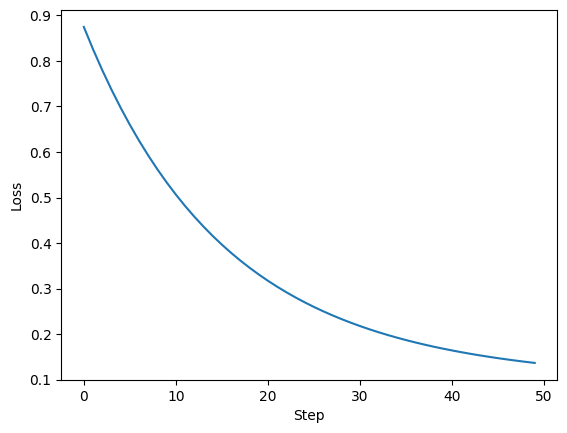

In [ ]:
import torch
import matplotlib.pyplot as plt

# 데이터 설정
train_x = torch.tensor(x, dtype=torch.float32)
train_y = torch.tensor(y, dtype=torch.float32)

# 모델 파라미터 초기화
w = torch.rand(size=(2, 1), requires_grad=True)
b = torch.ones(size=[1], requires_grad=True)

# 손실 기록
losses = []
learning_rate = 0.01
# 학습 과정
for step in range(50):
    pred = torch.matmul(train_x, w) + b
    J = torch.mean((pred - train_y) ** 2)
    J.backward()
    # 그래디언트 감소
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        w.grad.zero_()
        b.grad.zero_()
    losses.append(J.item())
    if step % 10 == 0:
        print("Step {}: Loss {}".format(step, J.item()))

# 손실 시각화
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()


# 고수준 학습 코드. 조금 더 파이토치스럽게!

Step 0: Loss 2.189077854156494
Step 10: Loss 1.0925179719924927
Step 20: Loss 0.5698572397232056
Step 30: Loss 0.32052475214004517
Step 40: Loss 0.2014399915933609


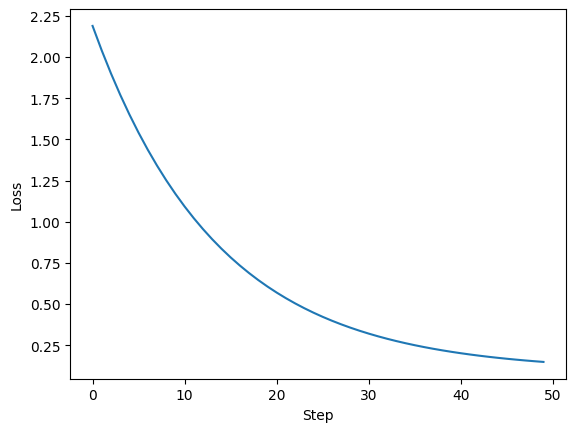

In [ ]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

# 선형 회귀 모델 클래스 정의
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

# 데이터 설정 예시 (실제 데이터는 이 코드에 적용해야 함)
# x = ... # x 데이터 설정
# y = ... # y 데이터 설정

train_x = torch.tensor(x, dtype=torch.float32)
train_y = torch.tensor(y, dtype=torch.float32)

# 손실 기록
losses = []
learning_rate = 0.01

# 모델, 손실 함수, 최적화 방법 정의
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 학습 과정
for step in range(50):
    optimizer.zero_grad()
    predictions = model(train_x)
    loss = criterion(predictions, train_y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if step % 10 == 0:
        print("Step {}: Loss {}".format(step, loss.item()))

# 손실 시각화
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()


## 모델의 예측을 시각화해보겠습니다.

In [ ]:
import numpy as np
import plotly.graph_objects as go
import torch

# 모델 예측
with torch.no_grad():
    train_x = torch.tensor(x, dtype=torch.float32)
    predicted_y = model(train_x).numpy()

# 실제 데이터 시각화
fig = go.Figure(data=[go.Scatter3d(x=x[:,0], y=x[:,1], z=y[:,0],
                                   mode='markers',
                                   marker=dict(size=3,
                                               color='blue',
                                               opacity=0.8))])

# 모델 예측 시각화
fig.add_trace(go.Scatter3d(x=x[:,0], y=x[:,1], z=predicted_y[:,0],
                           mode='markers',
                           marker=dict(size=3,
                                       color='red',
                                       opacity=0.8)))

# 그래프 레이아웃 설정
fig.update_layout(title='Real Data vs Model Prediction',
                  scene=dict(xaxis_title='X1',
                             yaxis_title='X2',
                             zaxis_title='Y'),
                  margin=dict(l=0, r=0, b=0, t=0))

fig.show()


# 비선형 회귀 문제

데이터 분포가 비선형성을 가질 때, 데이터 공간에서의 모델이 학습해야하는 데이터 구조는 더욱 복잡해집니다. 입력데이터의 특징들과 출력 사이의 상관성(correlation)이 없거나 구간에 따라 변화합니다. 또한 임의의 특징에 따라 예측을 위한 다른 특징의 분석이 달라질 수 있습니다.

In [ ]:
import plotly.graph_objects as go

m = 500
nonlinear_X = np.random.normal(0, 1, [m, 2])
nonlinear_X.shape
# 독립변수입력) x1, x2 => 종속변수(정답) y
nonlinear_Y = nonlinear_X[:,0]**2 + nonlinear_X[:,1]**2
fig = go.Figure(data=[go.Scatter3d(x=nonlinear_X[:,0], y=nonlinear_X[:,1], z=nonlinear_Y,
                                   mode='markers',
                                  marker=dict(  size=2,
                                                color = nonlinear_Y,
                                                colorscale='Viridis',   # choose a colorscale
                                                opacity=0.8
                                            ))])

fig.update_layout(
    title='Data distribution',
    autosize=True,
    width=500,
    height=500,
    xaxis=dict(range=[0.,10.]),
    margin=dict(l=65, r=50, b=65, t=90),
    scene_aspectmode='manual',
    scene_aspectratio=dict(x=1, y=1, z=1),
    scene=dict(
        xaxis= dict(range=[-5,5], nticks=20),
        yaxis= dict(range=[-5,5], nticks=20),
        zaxis= dict(range=[0,20]),
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Y',
    ))

fig.show()

## 비선형 데이터 분포를 선형모델로 도전해보겠습니다.

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning:

Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Step 0: Loss 8.299296379089355
Step 10: Loss 6.883114814758301
Step 20: Loss 5.931231498718262
Step 30: Loss 5.291369438171387
Step 40: Loss 4.861213207244873
Step 50: Loss 4.572010517120361
Step 60: Loss 4.377557277679443
Step 70: Loss 4.246801853179932
Step 80: Loss 4.158871173858643
Step 90: Loss 4.099735260009766
Step 100: Loss 4.059961795806885
Step 110: Loss 4.033208847045898
Step 120: Loss 4.015212535858154
Step 130: Loss 4.003106117248535
Step 140: Loss 3.9949612617492676
Step 150: Loss 3.9894819259643555
Step 160: Loss 3.9857945442199707
Step 170: Loss 3.98331356048584
Step 180: Loss 3.9816439151763916
Step 190: Loss 3.980520486831665
Step 200: Loss 3.979763984680176
Step 210: Loss 3.979255437850952
Step 220: Loss 3.978912830352783
Step 230: Loss 3.978682041168213
Step 240: Loss 3.9785265922546387
Step 250: Loss 3.9784224033355713
Step 260: Loss 3.9783520698547363
Step 270: Loss 3.978304386138916
Step 280: Loss 3.9782724380493164
Step 290: Loss 3.9782509803771973
Step 300: Los

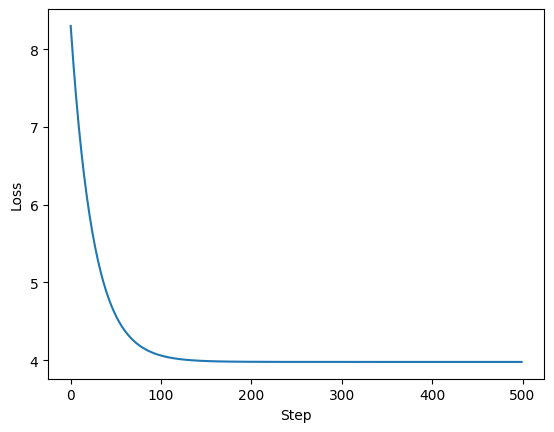

In [ ]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

# 선형 회귀 모델 클래스 정의
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

train_x = torch.tensor(nonlinear_X, dtype=torch.float32)
train_y = torch.tensor(nonlinear_Y, dtype=torch.float32)

# 손실 기록
losses = []
learning_rate = 0.01

# 모델, 손실 함수, 최적화 방법 정의
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 학습 과정
for step in range(500):
    optimizer.zero_grad()
    predictions = model(train_x)
    loss = criterion(predictions, train_y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if step % 10 == 0:
        print("Step {}: Loss {}".format(step, loss.item()))

# 손실 시각화
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()


## 선형모델의 출력분포는 데이터분포를 잘 반영하지 못 하는 것을 확인합니다.

In [ ]:
import numpy as np
import plotly.graph_objects as go
import torch

# 비선형 데이터 생성
m = 500
nonlinear_X = np.random.normal(0, 1, [m, 2])
nonlinear_Y = nonlinear_X[:, 0] ** 2 + nonlinear_X[:, 1] ** 2

train_x = torch.tensor(nonlinear_X, dtype=torch.float32)
predicted_y = model(train_x).detach().numpy()

# 실제 데이터 시각화
fig = go.Figure(data=[go.Scatter3d(x=nonlinear_X[:, 0], y=nonlinear_X[:, 1], z=nonlinear_Y,
                                   mode='markers',
                                   marker=dict(size=2,
                                               color=nonlinear_Y,
                                               colorscale='Viridis',
                                               opacity=0.8))])

fig.add_trace(go.Scatter3d(x=nonlinear_X[:, 0], y=nonlinear_X[:, 1], z=predicted_y[:, 0],
                           mode='markers',
                           marker=dict(size=2,
                                       color='red',
                                       opacity=0.8)))

# 그래프 레이아웃 설정
fig.update_layout(
    title='Data distribution vs Model Prediction',
    autosize=True,
    width=500,
    height=500,
    margin=dict(l=65, r=50, b=65, t=90),
    scene_aspectmode='manual',
    scene_aspectratio=dict(x=1, y=1, z=1),
    scene=dict(
        xaxis=dict(range=[-5, 5], nticks=20),
        yaxis=dict(range=[-5, 5], nticks=20),
        zaxis=dict(range=[0, 20]),
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Y'
    )
)

fig.show()



## 이번에는 간단한 비선형모델로 도전해보겠습니다. 우리의 모델에는 ReLU라는 비선형함수, 즉 activation function이 들어있습니다.

In [ ]:
import torch
from torch import nn

class NonLinearRegression(nn.Module):
    def __init__(self):
        super(NonLinearRegression, self).__init__()
        # 첫 번째 숨겨진 층
        self.hidden1 = nn.Linear(2, 10) # 2개의 입력 특성, 10개의 뉴런
        self.act1 = nn.ReLU() # 비선형 활성화 함수

        # 두 번째 숨겨진 층
        self.hidden2 = nn.Linear(10, 5) # 5개의 뉴런
        self.act2 = nn.ReLU()

        # 출력 층
        self.output = nn.Linear(5, 1) # 1개의 출력

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.output(x)
        return x

(500, 2) (500,)
Step 0: Loss 6.696544170379639
Step 50: Loss 1.0080450773239136
Step 100: Loss 0.4125393331050873
Step 150: Loss 0.2882501184940338
Step 200: Loss 0.18092794716358185
Step 250: Loss 0.14171411097049713
Step 300: Loss 0.12188316136598587
Step 350: Loss 0.10924211889505386
Step 400: Loss 0.0846039280295372
Step 450: Loss 0.07691650092601776


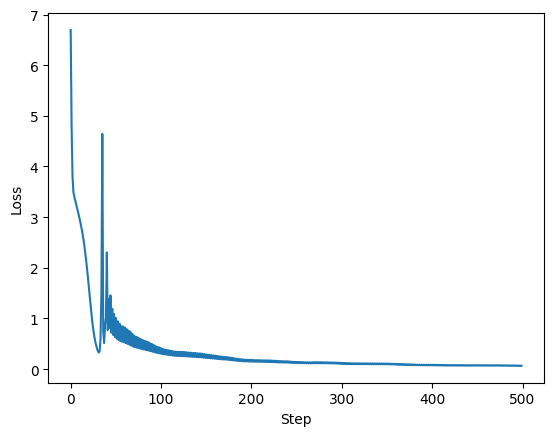

In [ ]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset


print(nonlinear_X.shape, nonlinear_Y.shape)
train_x = torch.tensor(nonlinear_X, dtype=torch.float32)
train_y = torch.tensor(nonlinear_Y.reshape(-1, 1), dtype=torch.float32)

# 손실 기록
losses = []
learning_rate = 0.1

# 모델, 손실 함수, 최적화 방법 정의
model = NonLinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

model.train()
losses = []


# 학습 과정
for step in range(500):
    optimizer.zero_grad()
    predictions = model(train_x)
    loss = criterion(predictions, train_y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if step % 50 == 0:
        print("Step {}: Loss {}".format(step, loss.item()))

# 손실 시각화
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

## 비선형모델의 출력분포는 비선형 데이터 분포를 잘 반영하며 학습 에러를 효과적으로 줄였습니다.

In [ ]:
import numpy as np
import plotly.graph_objects as go
import torch

# 비선형 데이터 생성
m = 500
nonlinear_X = np.random.normal(0, 1, [m, 2])
nonlinear_Y = nonlinear_X[:, 0] ** 2 + nonlinear_X[:, 1] ** 2

train_x = torch.tensor(nonlinear_X, dtype=torch.float32)
predicted_y = model(train_x).detach().numpy()

# 실제 데이터 시각화
fig = go.Figure(data=[go.Scatter3d(x=nonlinear_X[:, 0], y=nonlinear_X[:, 1], z=nonlinear_Y,
                                   mode='markers',
                                   marker=dict(size=2,
                                               color=nonlinear_Y,
                                               colorscale='Viridis',
                                               opacity=0.8))])

fig.add_trace(go.Scatter3d(x=nonlinear_X[:, 0], y=nonlinear_X[:, 1], z=predicted_y[:, 0],
                           mode='markers',
                           marker=dict(size=2,
                                       color='red',
                                       opacity=0.8)))

# 그래프 레이아웃 설정
fig.update_layout(
    title='Data distribution vs Model Prediction',
    autosize=True,
    width=500,
    height=500,
    margin=dict(l=65, r=50, b=65, t=90),
    scene_aspectmode='manual',
    scene_aspectratio=dict(x=1, y=1, z=1),
    scene=dict(
        xaxis=dict(range=[-5, 5], nticks=20),
        yaxis=dict(range=[-5, 5], nticks=20),
        zaxis=dict(range=[0, 20]),
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Y'
    )
)

fig.show()


# Step 4. Mission : Try to attack synthetic classification task
------

선형적으로 나눌 수 없는 데이터 분포(Non-linearly seperable problem)에 대한 이진분류 문제입니다.

In [ ]:
# 임의의 클래스 A와 클래스 B를 생성함.
m = 200
class_A = np.random.normal(0, 1, [m, 2])
label_A = np.ones([m, 1])

class_B_x = np.random.normal(0, 2, [m, 1])
class_B_y = 0.5*class_B_x**2 - 3

class_B = np.concatenate([class_B_x, class_B_y], axis = 1)
label_B = np.zeros([m, 1])

total_dataset = np.concatenate((class_A , class_B))
label = np.concatenate((label_A, label_B))
total_dataset = np.concatenate( (total_dataset, label), axis = 1  )

np.random.shuffle(total_dataset) # Shuffle dataset
print(total_dataset[:10])
print(total_dataset.shape)

[[-0.40557779 -0.4019544   1.        ]
 [ 0.40468663 -0.24941017  1.        ]
 [-0.0518924  -1.13619261  1.        ]
 [-0.32867025 -2.94598793  0.        ]
 [ 2.17083083 -0.64374675  0.        ]
 [ 1.52891304 -1.83121245  0.        ]
 [-0.20861069  0.11342803  1.        ]
 [ 1.09083084 -2.40504404  0.        ]
 [-0.93494799  0.80671338  1.        ]
 [-4.1427791   5.58130934  0.        ]]
(400, 3)


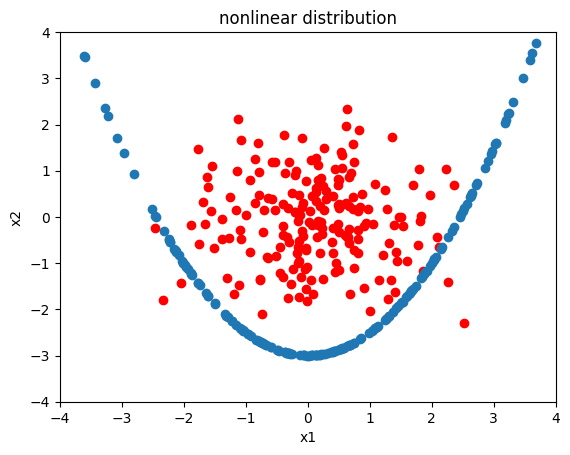

In [ ]:
#데이터 분포를 볼까요?

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title('nonlinear distribution')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])

ax1.scatter(class_A[:,0], class_A[:,1], c='red')

ax1.scatter(class_B[:,0], class_B[:,1])
plt.show()

## Logistic regression(선형모델)로 풀어보겠습니다!

In [ ]:
from torch import nn

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2,1)
    def forward(self, x):
        f = self.linear(x)
        y = torch.sigmoid(f) #sigmoid로 선형모델의 결과를 확률로 변환합니다.
        return y

Step 0: Loss 0.6909056305885315
Step 500: Loss 0.674427330493927
Step 1000: Loss 0.674427330493927
Step 1500: Loss 0.674427330493927
Step 2000: Loss 0.674427330493927
Step 2500: Loss 0.674427330493927
Step 3000: Loss 0.674427330493927
Step 3500: Loss 0.674427330493927
Step 4000: Loss 0.674427330493927
Step 4500: Loss 0.674427330493927


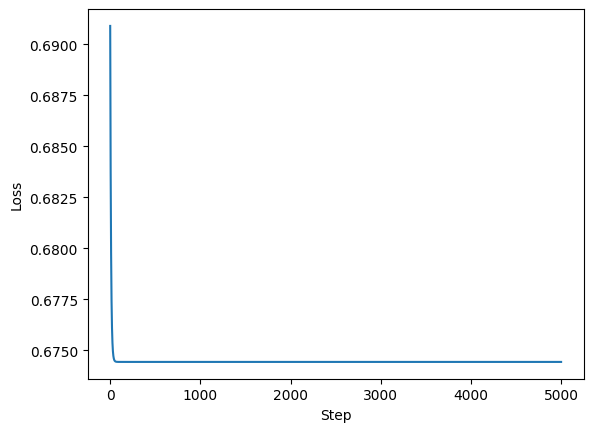

In [ ]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

train_x = torch.tensor(total_dataset[:,:2], dtype=torch.float32)
train_y = torch.tensor(total_dataset[:,2:].reshape(-1, 1), dtype=torch.float32)

# 손실 기록
losses = []
learning_rate = 0.1

# 모델, 손실 함수, 최적화 방법 정의
model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

model.train()
losses = []


# 학습 과정
for step in range(5000):
    optimizer.zero_grad()
    predictions = model(train_x)
    loss = criterion(predictions, train_y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if step % 500 == 0:
        print("Step {}: Loss {}".format(step, loss.item()))

# 손실 시각화
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

## 모델 정확도(%) 계산

In [ ]:
# 모델을 평가 모드로 설정
model.eval()

# 예측 수행
with torch.no_grad():
    predictions = model(train_x)

# 예측값을 이진 값으로 변환 (임계값: 0.5)
predicted_labels = (predictions > 0.5).float()

# 정확도 계산
accuracy = (predicted_labels == train_y).float().mean().item()

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 70.25%


## 선형모델의 결정영역(decision boundary)의 시각화

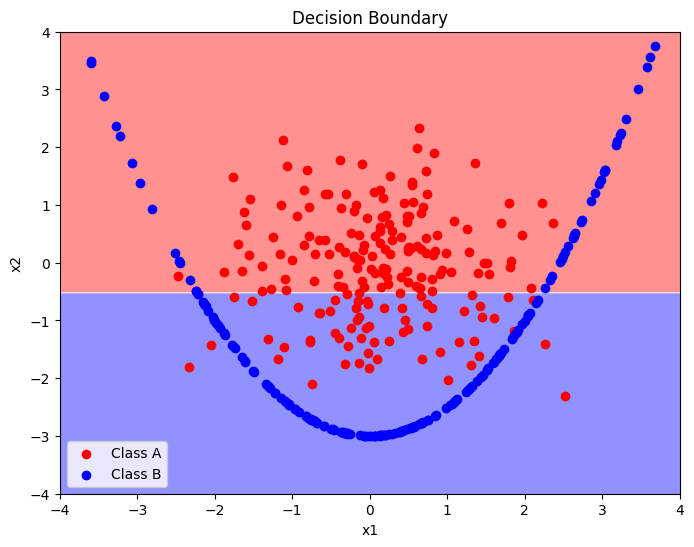

In [ ]:
import numpy as np

# 입력 공간을 덮는 그리드 포인트 생성
x1_range = np.linspace(-4, 4, 200)
x2_range = np.linspace(-4, 4, 200)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid = np.c_[xx1.ravel(), xx2.ravel()]

# 모델을 평가 모드로 설정
model.eval()

# 그리드 포인트에 대한 예측 수행
with torch.no_grad():
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    predictions = model(grid_tensor)
    predicted_labels = (predictions > 0.5).float()

# 예측 결과를 그리드 크기로 재구성
Z = predicted_labels.view(xx1.shape)

# 데이터와 결정 경계 시각화
plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=plt.cm.bwr)
plt.scatter(class_A[:, 0], class_A[:, 1], c='red', label='Class A')
plt.scatter(class_B[:, 0], class_B[:, 1], c='blue', label='Class B')
plt.title('Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.legend()
plt.show()


### 미션 : 비선형 이진분류 문제를 풀기 위해 아래 그림을 참고하여 pytorch 모델을 만들고 학습시켜보기

모델의 구조는 다음과 같습니다.

input(2D) => Linear(16) => ReLU => Linear(8) => ReLU => Linear(1) => Sigmoid

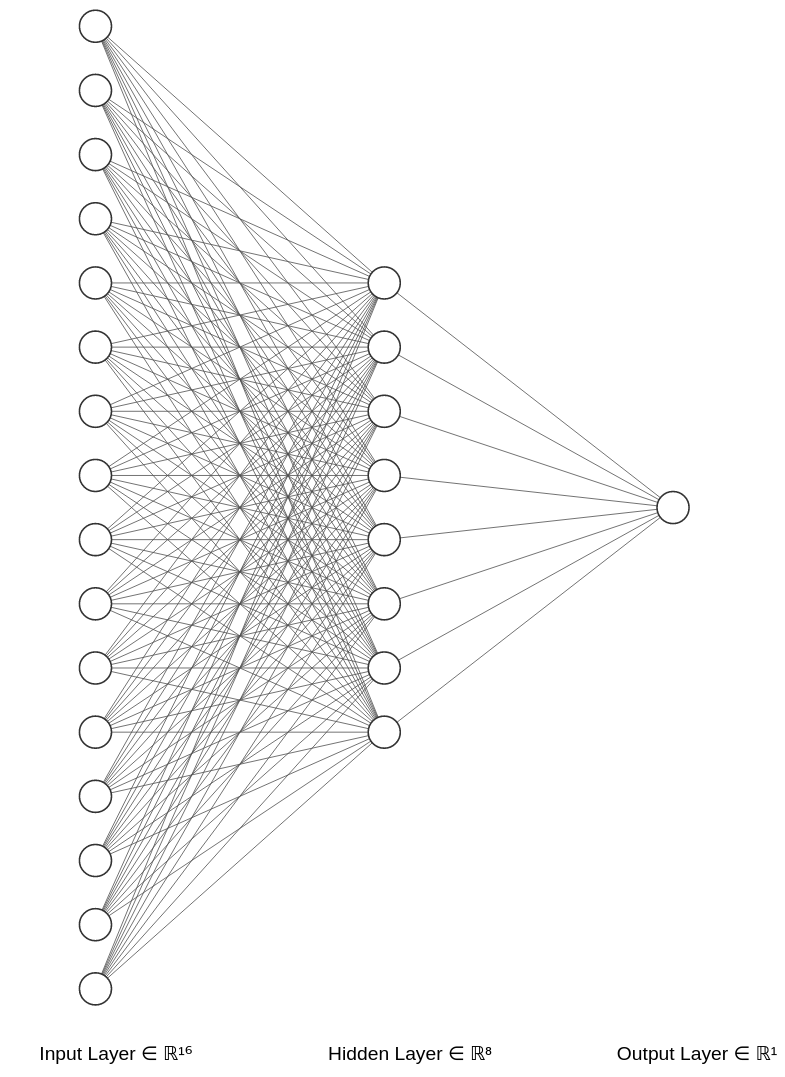

In [ ]:
import torch
from torch import nn

class NeuralLogisticRegression(nn.Module):
    def __init__(self):
        super(NeuralLogisticRegression, self).__init__()
        # 첫 번째 숨겨진 층
        self.hidden1 = nn.Linear(2, 16) # 2개의 입력 특성, 10개의 뉴런
        self.act1 = nn.ReLU() # 비선형 활성화 함수

        # 두 번째 숨겨진 층
        self.hidden2 = nn.Linear(16, 8) # 5개의 뉴런
        self.act2 = nn.ReLU()

        # 출력 층
        self.output = nn.Linear(8, 1) # 1개의 출력

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.output(x)
        y = torch.sigmoid(x) #sigmoid로 선형모델의 결과를 확률로 변환합니다.
        return y

class ComplexerNeuralLogisticRegression(nn.Module):
    def __init__(self):
        super(ComplexerNeuralLogisticRegression, self).__init__()
        self.nonlinear_stack = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        x = self.nonlinear_stack(x)
        y = torch.sigmoid(x)
        return y

Step 0: Loss 0.677804172039032
Step 500: Loss 0.13298003375530243
Step 1000: Loss 0.12315960228443146
Step 1500: Loss 0.11961738765239716
Step 2000: Loss 0.11599607765674591
Step 2500: Loss 0.11315564811229706
Step 3000: Loss 0.11042749136686325
Step 3500: Loss 0.10789621621370316
Step 4000: Loss 0.10549131035804749
Step 4500: Loss 0.10256047546863556


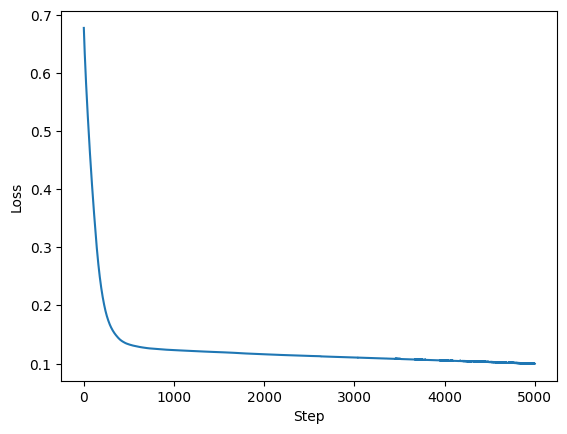

In [ ]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

train_x = torch.tensor(total_dataset[:,:2].reshape(-1, 2), dtype=torch.float32)
train_y = torch.tensor(total_dataset[:,2:].reshape(-1, 1), dtype=torch.float32)

# 손실 기록
losses = []
learning_rate = 0.1

# 모델, 손실 함수, 최적화 방법 정의
model = NeuralLogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

model.train()
losses = []

model.train()
# 학습 과정
for step in range(5000):
    optimizer.zero_grad()
    predictions = model(train_x)
    loss = criterion(predictions, train_y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if step % 500 == 0:
        print("Step {}: Loss {}".format(step, loss.item()))
# 손실 시각화
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

## 모델 정확도(%) 계산

In [ ]:
# 모델을 평가 모드로 설정
model.eval()

# 예측 수행
with torch.no_grad():
    predictions = model(train_x)

# 예측값을 이진 값으로 변환 (임계값: 0.5)
predicted_labels = (predictions > 0.5).float()

# 정확도 계산
accuracy = (predicted_labels == train_y).float().mean().item()

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.00%


## 결정영역의 시각화

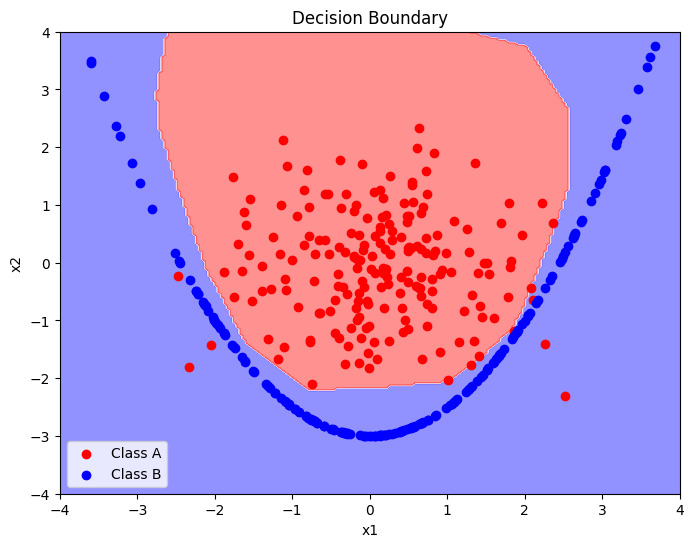

In [ ]:
# 입력 공간을 덮는 그리드 포인트 생성
x1_range = np.linspace(-4, 4, 200)
x2_range = np.linspace(-4, 4, 200)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid = np.c_[xx1.ravel(), xx2.ravel()]

# 모델을 평가 모드로 설정
model.eval()

# 그리드 포인트에 대한 예측 수행
with torch.no_grad():
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    predictions = model(grid_tensor)
    predicted_labels = (predictions > 0.5).float()

# 예측 결과를 그리드 크기로 재구성
Z = predicted_labels.view(xx1.shape)

# 데이터와 결정 경계 시각화
plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=plt.cm.bwr)
plt.scatter(class_A[:, 0], class_A[:, 1], c='red', label='Class A')
plt.scatter(class_B[:, 0], class_B[:, 1], c='blue', label='Class B')
plt.title('Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.legend()
plt.show()
